![png](../../../imagenes/logotipo-axity-ppt.png)

# Kernel PCA

## Explicación del Ejemplo

Se busca que el modelo prediga si el cliente realizará una compra o no, basándose en las demás características  

### Los datos
Variable|Definición|Llave
-- | --| --
User Id|Número de cliente|
Gender|Género|Male, Female
Age|Edad|
EstimatedSalary|Sueldo estimado|
Purchased|Si realizó una compra o no|0 = no, 1 = si

In [1]:
# Importar las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importar el conjunto de datos
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# Revisión del conjunto de datos
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [6]:
# Obtener las características y el valor objetivo
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values
print (X)
print (y)

[[1.90e+01 1.90e+04]
 [3.50e+01 2.00e+04]
 [2.60e+01 4.30e+04]
 [2.70e+01 5.70e+04]
 [1.90e+01 7.60e+04]
 [2.70e+01 5.80e+04]
 [2.70e+01 8.40e+04]
 [3.20e+01 1.50e+05]
 [2.50e+01 3.30e+04]
 [3.50e+01 6.50e+04]
 [2.60e+01 8.00e+04]
 [2.60e+01 5.20e+04]
 [2.00e+01 8.60e+04]
 [3.20e+01 1.80e+04]
 [1.80e+01 8.20e+04]
 [2.90e+01 8.00e+04]
 [4.70e+01 2.50e+04]
 [4.50e+01 2.60e+04]
 [4.60e+01 2.80e+04]
 [4.80e+01 2.90e+04]
 [4.50e+01 2.20e+04]
 [4.70e+01 4.90e+04]
 [4.80e+01 4.10e+04]
 [4.50e+01 2.20e+04]
 [4.60e+01 2.30e+04]
 [4.70e+01 2.00e+04]
 [4.90e+01 2.80e+04]
 [4.70e+01 3.00e+04]
 [2.90e+01 4.30e+04]
 [3.10e+01 1.80e+04]
 [3.10e+01 7.40e+04]
 [2.70e+01 1.37e+05]
 [2.10e+01 1.60e+04]
 [2.80e+01 4.40e+04]
 [2.70e+01 9.00e+04]
 [3.50e+01 2.70e+04]
 [3.30e+01 2.80e+04]
 [3.00e+01 4.90e+04]
 [2.60e+01 7.20e+04]
 [2.70e+01 3.10e+04]
 [2.70e+01 1.70e+04]
 [3.30e+01 5.10e+04]
 [3.50e+01 1.08e+05]
 [3.00e+01 1.50e+04]
 [2.80e+01 8.40e+04]
 [2.30e+01 2.00e+04]
 [2.50e+01 7.90e+04]
 [2.70e+01 5.

In [7]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
# Aplicar Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = "rbf")
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [10]:
# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicción de los resultados con el Conjunto de Prueba
y_pred  = classifier.predict(X_test)

In [12]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 6, 26]], dtype=int64)

In [13]:
# Obtener el informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        68
           1       0.87      0.81      0.84        32

    accuracy                           0.90       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


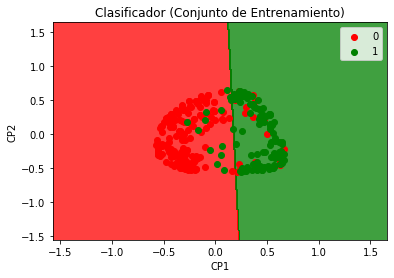

In [14]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


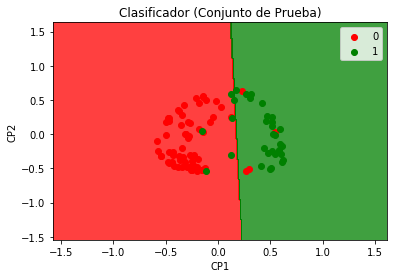

In [15]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Prueba
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Prueba)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()